***Fourier Transform and its drawback***

离散傅里叶变换（Discrete Fourier Transform, DFT）的物理意义在于：*将有限长离散序列映射到由正交复指数基函数张成的频域空间中，实现对信号频谱结构的离散化表征*。具体而言：

***正交分解与频谱投影***

设离散信号$x[n]$长度为$N$，DFT通过内积运算：  
$X[k]=\sum^{N-1}_{n=0}x[n]e^{-j\frac{2\pi}{N}kn}, 0<=k<=N-1$  
将信号投影到一组完备正交基$\{e^{-j\frac{2\pi}{N}kn}\}$上，每个基函数对应**离散频率**$f_k=\frac{k}{N}f_s$（$f_s$为采样率），系数$X[k]$表征信号在**该频率分量上的复振幅（含幅度与相位）**

![time_and_freq](./time_and_freq.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
N = 64                   # Signal length
fs = 1000                # Sampling rate (Hz)
t = np.arange(N)/fs       # Time axis
freqs = [50, 120, 200]   # Frequency components (Hz)
A = [1, 0.8, 0.5]        # Amplitudes
phi = [0, np.pi/3, -np.pi/4]  # Phase components

# Generate test signal: sum of sinusoids
x = np.zeros(N, dtype=complex)
for f, a, p in zip(freqs, A, phi):
    x += a * np.exp(1j*(2*np.pi*f*t + p))
x = x.real  # Convert to real-valued signal

# Compute DFT
X = np.fft.fft(x)
f_axis = np.fft.fftfreq(N, 1/fs)

# Create orthogonal basis functions (k=5, 15)
k_list = [5, 15]
basis = {}
for k in k_list:
    basis[k] = np.exp(-1j*2*np.pi*k*np.arange(N)/N)

# Visualization
fig = plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

1. **合成多频信号**：
   - 基于50Hz(主频)、120Hz(次强)及200Hz(较弱)三种正弦波叠加构成复合信号
   - 各成分分别带有不同的幅度(A)与相位偏移(φ)
   - 最终取其实部形成实数时域序列

2. **频谱分析处理**：
   - 对合成后的时域数据执行快速傅里叶变换(FFT)
   - 建立对应物理意义的频点坐标(f_axis)

3. **构建观测基底**：
   - 特别选取k=5与15两个bin位置
   - 构造相应复指数基底向量(basis字典)

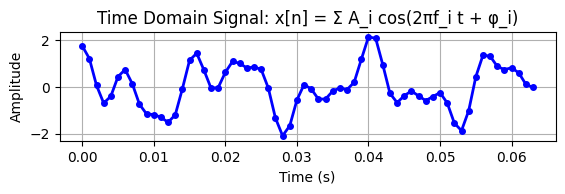

In [2]:
# 1. Original signal
ax1 = plt.subplot(3, 1, 1)
ax1.plot(t, x, 'b-o', lw=2, markersize=4, label='Original Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Time Domain Signal: x[n] = Σ A_i cos(2πf_i t + φ_i)')
ax1.grid(True)

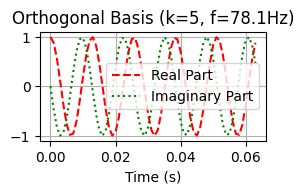

In [3]:
# 2. Basis functions visualization
ax2 = plt.subplot(3, 2, 3)
k = k_list[0]
ax2.plot(t, basis[k].real, 'r--', label='Real Part')
ax2.plot(t, basis[k].imag, 'g:', label='Imaginary Part')
ax2.set_title(f'Orthogonal Basis (k={k}, f={f_axis[k]:.1f}Hz)')
ax2.set_xlabel('Time (s)')
ax2.legend()
ax2.grid(True)

2. **提取基底参数**：
   - 获取首个测试频点的索引值(k=k_list[0]=5)
   - 对应物理频率通过fftfreq计算结果约为78.125Hz (1000Hz采样率下N=64时的分辨率) $f=k\frac{f_s}{N}$

3. **双分量绘图**：
   以时间为横轴分别绘出：
   - DFT核函数的实数分量(r--红色虚线表示)
   - 虚数分量(g:绿色点线表示)

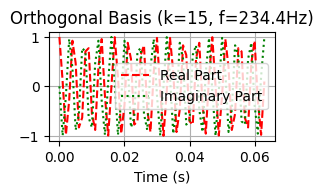

In [4]:
ax3 = plt.subplot(3, 2, 4)
k = k_list[1]
ax3.plot(t, basis[k].real, 'r--', label='Real Part')
ax3.plot(t, basis[k].imag, 'g:', label='Imaginary Part')
ax3.set_title(f'Orthogonal Basis (k={k}, f={f_axis[k]:.1f}Hz)')
ax3.set_xlabel('Time (s)')
ax3.legend()
ax3.grid(True)

2.**高频分量展示**：
   - 选取第二个测试频点(k=k_list[1]=15)
   - 对应实际频率通过公式计算为 \( f_{15} = \frac{15 × 1000}{64} ≈234.375\text{Hz} \) 
    （或直接使用预先计算的f_axis[k]值）

3.**复数波形对比**：
   保持与前一幅相同风格的双线型绘制：
   - 红色虚线表示基底的实部信号
   - 绿色点线表示虚部振动模式 

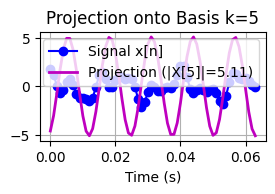

In [5]:
# 3. Projection visualization
ax4 = plt.subplot(3, 2, 5)
k = k_list[0]
projection = basis[k].real*X[k].real + basis[k].imag*X[k].imag
ax4.plot(t, x, 'b-o', label='Signal x[n]')
ax4.plot(t, projection, 'm-', lw=2, 
         label=f'Projection (|X[{k}]|={np.abs(X[k]):.2f})')
ax4.set_xlabel('Time (s)')
ax4.set_title(f'Projection onto Basis k={k}')
ax4.legend()
ax4.grid(True)

**时域重构验证**：  
   选取首个测试频点(k=5)，通过频域系数反推其在时域的贡献量，  
   具体计算公式为:  
   $\text{proj}[n]=Re\{\phi_k[n]\}\cdot Re\{c_k\} + Im\{\phi_k[n]\}\cdot Im\{c_k\}$  
   这相当于提取该频率成分在整个时间序列中的线性组合表现  
   - $\phi_k[n]$ = DFT的第k个基底向量 ($e^{-j\frac{2\pi}{N}kn}$)  
   - $c_k = X[k]$，即信号在该基底方向上的复系数(包含幅度与相位)

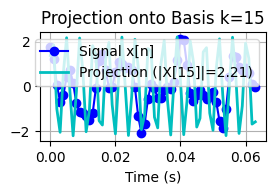

In [6]:
ax5 = plt.subplot(3, 2, 6)
k = k_list[1]
projection = basis[k].real*X[k].real + basis[k].imag*X[k].imag
ax5.plot(t, x, 'b-o', label='Signal x[n]')
ax5.plot(t, projection, 'c-', lw=2,
         label=f'Projection (|X[{k}]|={np.abs(X[k]):.2f})')
ax5.set_xlabel('Time (s)')
ax5.set_title(f'Projection onto Basis k={k}')
ax5.legend()
ax5.grid(True)

(0.0, 500.0)

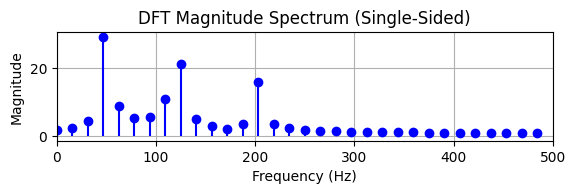

In [7]:
# 4. Full magnitude spectrum
ax6 = plt.subplot(3, 1, 3)
ax6.stem(f_axis[:N//2], np.abs(X[:N//2]), 'b', 
         markerfmt='bo', basefmt=' ', linefmt='b-')
ax6.set_xlabel('Frequency (Hz)')
ax6.set_ylabel('Magnitude')
ax6.set_title('DFT Magnitude Spectrum (Single-Sided)')
ax6.grid(True)
ax6.set_xlim(0, fs/2)

***复振幅$X[k]$的数学结构***  
在DFT中，频域系数$X[k]$是一个复数，可表示为：  
$X[k]=a_k+jb_k=|X[k]|e^{j\phi_k}$  
**实部$a_k$和虚部$b_k$**：构成复数的笛卡尔坐标形式  
**幅度（Magnitude）**$|X[k]|$：复数的模长，定义为：  
$|X[k]|=\sqrt{a^2_k+b^2_k}$  
**相位（Phase）**$\phi_k$：复数在复平面上的角度，定义为：  
$\phi_k=\arctan(\frac{b_k}{a_k})$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# 参数设置
fs = 1000                # 采样率
N = 64                   # 采样点数
f0 = 156.25              # 信号频率 (对应k=10)
t = np.arange(N)/fs       # 时间向量

# 生成测试信号
x = 2.5 * np.cos(2*np.pi*f0*t + np.pi/3)  # 幅度2.5，相位60度

# 计算DFT
X = np.fft.fft(x)
k = 10                   # 目标频点索引
a = X[k].real            # 实部
b = X[k].imag            # 虚部
mag = np.abs(X[k])       # 幅度
phi = np.angle(X[k])     # 相位 (弧度)

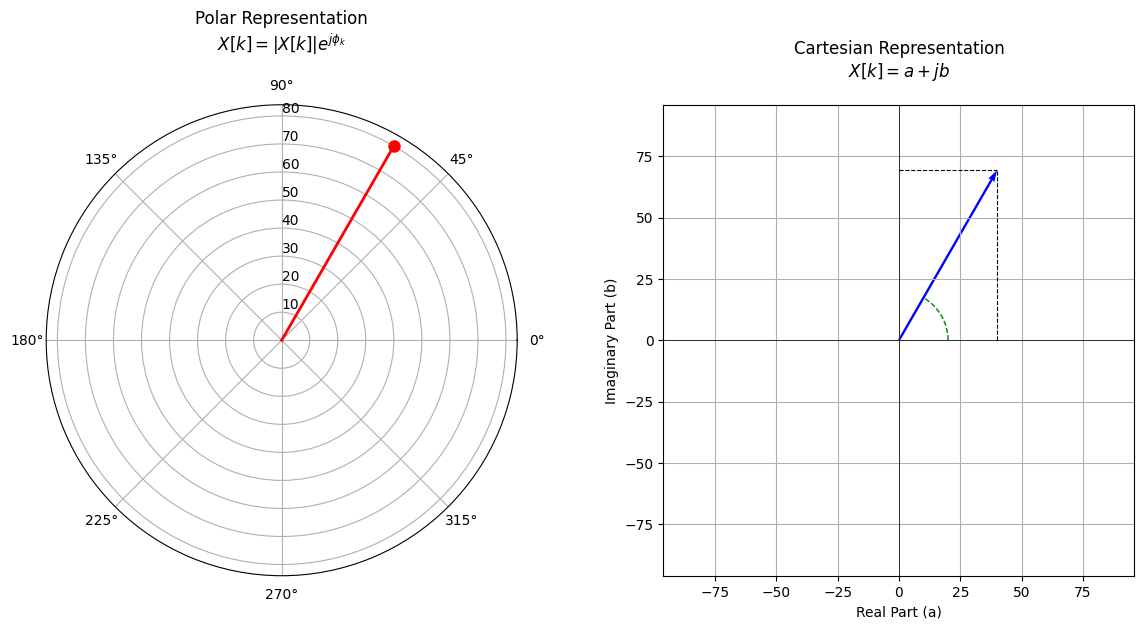

In [16]:
# 可视化设置
plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection='polar')  # 极坐标图
ax_cart = plt.subplot(122)                # 笛卡尔坐标图

# 极坐标图 -------------------------------------------------
ax.plot([0, phi], [0, mag], 'r-', linewidth=2, label='Phasor')
ax.plot(phi, mag, 'ro', markersize=8)
ax.set_title("Polar Representation\n$X[k] = |X[k]|e^{j\phi_k}$", pad=20)
ax.set_theta_zero_location("E")  # 0度方向向右
ax.set_rlabel_position(90)       # 半径标签位置
ax.grid(True)

# 笛卡尔坐标图 ---------------------------------------------
# 绘制复平面坐标系
ax_cart.axhline(0, color='black', lw=0.5)
ax_cart.axvline(0, color='black', lw=0.5)
ax_cart.set_aspect('equal')
ax_cart.set_xlim(-mag*1.2, mag*1.2)
ax_cart.set_ylim(-mag*1.2, mag*1.2)

# 绘制向量
ax_cart.quiver(0, 0, a, b, angles='xy', scale_units='xy', scale=1,
               color='b', width=0.005, label='Complex Amplitude')

ax_cart.plot([a, a], [0, b], 'k--', lw=0.8)  # 虚部投影线
ax_cart.plot([0, a], [b, b], 'k--', lw=0.8)  # 实部投影线

# 添加相位角标注
arc = Arc((0,0), 0.5*mag, 0.5*mag, theta1=0, theta2=np.rad2deg(phi), 
          linestyle='--', color='g')
ax_cart.add_patch(arc)

# 标签设置
ax_cart.set_title("Cartesian Representation\n$X[k] = a + jb$", pad=20)
ax_cart.set_xlabel("Real Part (a)")
ax_cart.set_ylabel("Imaginary Part (b)")
ax_cart.grid(True)
plt.tight_layout()
plt.show()

***复振幅$X[k]$的物理意义：信号的正交分解***   
DFT将离散信号$x[n]$分解为多个**复指数分量**的线性组合：  
$x[n]=\frac{1}{N}\sum^{N-1}_{k=0}X[k]e^{j\frac{2\pi}{N}kn}$  
其中每个分量$X[k]e^{j\frac{2\pi}{N}kn}$对应**频率$f_k=\frac{k}{N}f_s$**，而$X[k]$的幅度和相位分别控制该频率分量的强度与时移特性。

**幅度$|X[k]|$**  
***物理意义***：表示信号中频率为$f_k$的正弦/余弦分量的**幅值大小**  
***能量关联***：幅度的平方$|X[k]|^2$正比于该频率成分的**功率**（能量密度），在频谱中体现为谱线高度  
**example**:  
$|X[3]|=5$说明信号中第三个频率分量（对应$f_3=\frac{3}{N}f_s$）的幅值为5

**相位$\phi_k$**  
***物理意义***：表示频率分量的**初始相位偏移**，即该正弦/余弦波在时间起点$n=0$处的角度位置  
***波形影响***：相位决定了正弦波在时域中的“起始点”，相同频率、相同幅度的信号若相位不同，叠加后波形会发生变化  
**示例**：  
设两信号分量均为幅度1的正弦波，频率相同但相位相差$\frac{\pi}{2}$：  
$x_1[n]=\sin(\frac{2\pi}{N}kn), x_2[n]=\sin(\frac{2\pi}{N}kn+\frac{\pi}{2})$  
则$x_2[n]$的波形相比于$x_1[n]$提前四分之一周期开始

**复振幅的几何解释**  
复指数基函数$e^{j\frac{2\pi}{N}kn}$在复平面上可视为**旋转向量**：  
**旋转速率**：由频率$f_k$决定，每采样点旋转$\frac{2\pi k}{N}$弧度  
***复振幅$X[k]$***：对该旋转向量的缩放与初始相位调整

**实际信号中的幅度与相位**  
***实数信号特征***：若原信号$x[n]$为实数，DFT结果满足共轭对称性：  
$X[k]=X^*[N-k]$  
此时正负频率分量的幅度相同，相位相反（$\phi_k=-\phi_{N-k}$）  
***相位的重要性***：在信号重构（如滤波器设计、图像处理）中，相位信息决定了信号的时域波形细节。仅保留幅度谱而忽略相位时，信号可能完全失真

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 生成实数信号
fs = 1000  # 采样率
N = 128    # 信号长度
t = np.arange(N)/fs

# 生成多频信号
x = (1.2 * np.cos(2*np.pi*50*t + np.pi/4) + 
     0.8 * np.cos(2*np.pi*120*t - np.pi/3))

# 计算DFT
X = np.fft.fft(x)
freq = np.fft.fftfreq(N, 1/fs)
magnitude = np.abs(X)
phase = np.angle(X)

# 验证共轭对称性
k_test = 30
print(f"验证共轭对称性 (k={k_test} vs k={N-k_test}):")
print(f"X[{k_test}] = {X[k_test]:.3f}")
print(f"X[{N-k_test}] = {X[N-k_test]:.3f}")
print(f"Conjugate: {np.conj(X[N-k_test]):.3f}\n")


验证共轭对称性 (k=30 vs k=98):
X[30] = 0.483-1.282j
X[98] = 0.483+1.282j
Conjugate: 0.483-1.282j



In [18]:
# 信号重构实验
# 实验1：仅保留幅度信息（相位归零）
X_mag_only = magnitude * np.exp(0j)  # 相位设为0
x_mag = np.fft.ifft(X_mag_only).real

In [19]:
# 实验2：仅保留相位信息（幅度归一化）
X_phase_only = np.exp(1j * phase)    # 幅度设为1
x_phase = np.fft.ifft(X_phase_only).real

In [20]:
# 实验3：随机相位（保持幅度）
random_phase = 2*np.pi*np.random.rand(N)
X_random_phase = magnitude * np.exp(1j*random_phase)
x_rand_phase = np.fft.ifft(X_random_phase).real

(-500.0, 500.0)

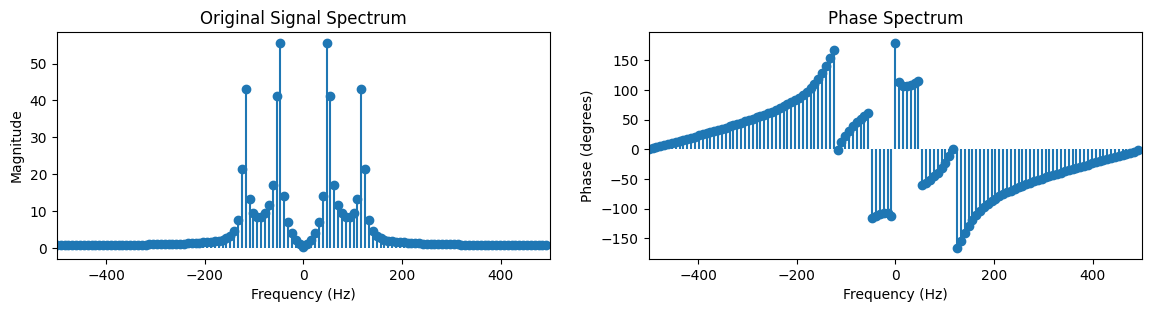

In [21]:
# 可视化
plt.figure(figsize=(14, 10))

# 原始信号频谱
plt.subplot(3, 2, 1)
plt.stem(freq, magnitude, basefmt=' ')
plt.title('Original Signal Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-fs/2, fs/2)

plt.subplot(3, 2, 2)
plt.stem(freq, np.rad2deg(phase), basefmt=' ')
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.xlim(-fs/2, fs/2)

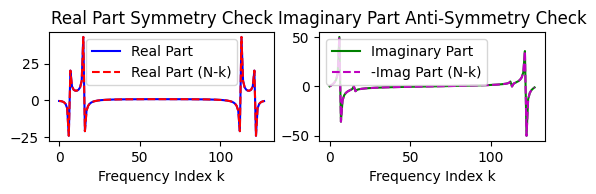

In [24]:
# 共轭对称性展示
plt.subplot(3, 2, 3)
k = np.arange(N)
plt.plot(k, X.real, 'b', label='Real Part')
plt.plot(k, X[(N-k) % N].real, 'r--', label='Real Part (N-k)')
plt.title('Real Part Symmetry Check')
plt.xlabel('Frequency Index k')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(k, X.imag, 'g', label='Imaginary Part')
plt.plot(k, -X[(N-k) % N].imag, 'm--', label='-Imag Part (N-k)')
plt.title('Imaginary Part Anti-Symmetry Check')
plt.xlabel('Frequency Index k')
plt.legend()

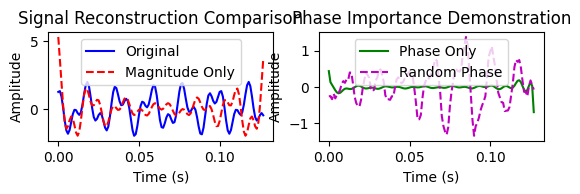

In [25]:
# 信号重构对比
plt.subplot(3, 2, 5)
plt.plot(t, x, 'b', label='Original')
plt.plot(t, x_mag, 'r--', label='Magnitude Only')
plt.title('Signal Reconstruction Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(t, x_phase, 'g', label='Phase Only')
plt.plot(t, x_rand_phase, 'm--', label='Random Phase')
plt.title('Phase Importance Demonstration')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

**频域离散化与周期性**  
DFT隐含对时域信号进行**周期延拓**，导致频域响应$X[k]$具有离散型与周期性（周期为$N$）  
此特性使得DFT可视为对连续频谱的**等间隔采样**，采样间隔为$\Delta f=\frac{f_s}{N}$，即频率分辨率

**能量守恒与Parseval定理**  
DFT满足能量守恒关系：  
$\sum^{N-1}_{n=0}|x[n]|^2=\frac{1}{N}\sum^{N-1}_{k=0}|X[k]|^2$  
表明时域与频域能量分布的一致性，$|X[k]|^2$直接反应各频率成分的功率谱密度

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
N = 128                   # 信号长度
fs = 1000                 # 采样率(Hz)
t = np.arange(N)/fs        # 时间轴
freqs = [80, 150, 240]    # 信号频率成分(Hz)
A = [1.5, 0.7, 1.2]       # 各频率幅度

# 生成多频实数信号
x = np.sum([a * np.cos(2*np.pi*f*t + np.random.uniform(-np.pi, np.pi)) 
          for f, a in zip(freqs, A)], axis=0)

# 计算DFT
X = np.fft.fft(x)
f_axis = np.fft.fftfreq(N, 1/fs)

# 计算能量
energy_time = np.sum(np.abs(x)**2)        # 时域能量
energy_freq = np.sum(np.abs(X)**2) / N    # 频域能量
relative_error = np.abs(energy_time - energy_freq)/energy_time * 100

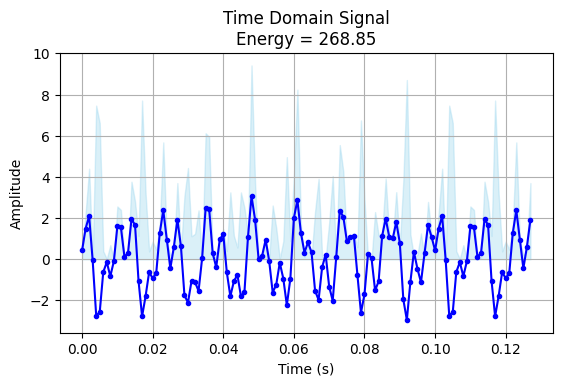

In [28]:
# 可视化
plt.figure(figsize=(14, 8))

# 时域信号与能量分布
ax1 = plt.subplot(2, 2, 1)
ax1.plot(t, x, 'b-o', markersize=3)
ax1.fill_between(t, 0, x**2, color='skyblue', alpha=0.3)
ax1.set_title(f'Time Domain Signal\nEnergy = {energy_time:.2f}')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

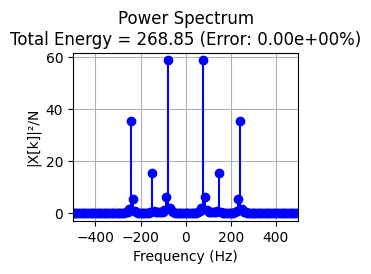

In [29]:
# 频域幅度平方谱
ax2 = plt.subplot(2, 2, 2)
ax2.stem(f_axis, np.abs(X)**2/N, linefmt='b-', markerfmt='bo', basefmt=' ')
ax2.set_title(f'Power Spectrum\nTotal Energy = {energy_freq:.2f} (Error: {relative_error:.2e}%)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('|X[k]|²/N')
ax2.set_xlim(-fs/2, fs/2)
ax2.grid(True)

![stft](./stft.png)

**短时傅里叶变换STFT**  
短时傅里叶变换（Short-Time Fourier Transform, STFT）是一种时频分析工具，通过将信号分帧并逐帧进行傅里叶变换，克服了传统傅里叶变换无法处理非平稳信号的局限性

**数学原理**  
对离散信号$x[n]$，STFT的离散形式为：  
$STFT\{x[n]\}(m,k)=\sum^{N-1}_{n=0}x[n+mH]w[n]e^{-j\frac{2\pi}{N}kn}$  
- $N$：窗口长度（帧长）（长窗口频率分辨率高，时间分辨率低）
- $H$：帧移（控制帧间重叠量）
- $k$：频率索引，对应频率$f_k=\frac{kf_s}{N}$
- $m$：时间帧索引

In [38]:
import librosa
import numpy as np

# 加载音频
y, sr = librosa.load('audio.wav', sr=None)

# 计算STFT
n_fft = 2048      # 窗口长度
hop_length = 512   # 帧移
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window='hann')

# 幅度谱转分贝
magnitude = np.abs(stft)
db_spectrogram = librosa.amplitude_to_db(magnitude, ref=np.max)

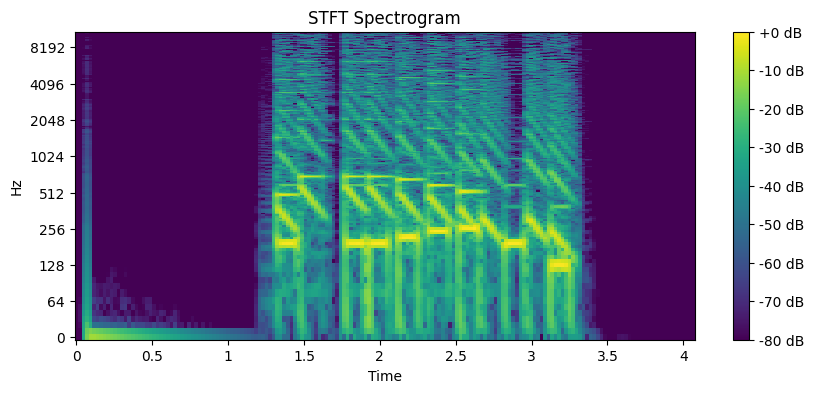

In [39]:
import matplotlib.pyplot as plt

# 绘制频谱图
plt.figure(figsize=(10, 4))
librosa.display.specshow(db_spectrogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.show()

**帧移（Hop Length）**  
在STFT中，帧移（Hop Length）和重叠的设计是时频分析的关键，其核心目的是平衡时间分辨率与频谱连续性，并确保信号分析的完整性

**帧移与重叠的数学必要性**  
***(1) 窗函数的边缘衰减***  
窗函数（如汉宁窗）在两端趋近于零，导致帧边缘的信号被抑制。  
若帧移等于窗长（无重叠），则相邻帧之间会漏掉窗函数衰减区的信号信息  
**重叠的作用**：通过帧移$H<N$，相邻帧覆盖被前一帧窗函数衰减的区域，补偿信号损失

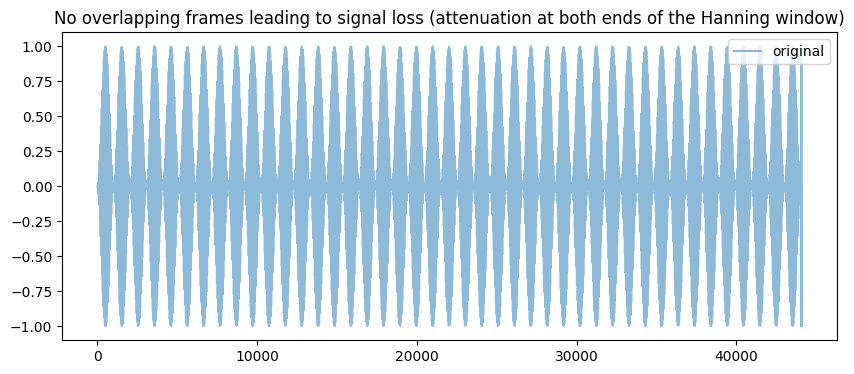

In [57]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 1024
hop_length = n_fft  # 无重叠
window = np.hanning(n_fft)

# 生成一个测试信号（正弦波）
t = np.linspace(0, 1, 44100)
signal = np.sin(2 * np.pi * 1000 * t)

# 分帧（无重叠）
frames = []
for i in range(0, len(signal), hop_length):
    frame = signal[i:i+n_fft] 
    # 前置填充保证后续运算维度一致
    if len(frame) < n_fft:
        frame = np.pad(frame, (0, n_fft - len(frame)))
    # 后置加窗前处理确保shape对齐 
    frame *= window  

# 绘制分帧和窗函数
plt.figure(figsize=(10, 4))
plt.plot(signal, alpha=0.5, label='original')
for i, frame in enumerate(frames[:3]):
    plt.plot(np.arange(i*hop_length, i*hop_length + n_fft), frame, label=f'frame {i+1} (with windows)')
plt.title('No overlapping frames leading to signal loss (attenuation at both ends of the Hanning window)')
plt.legend()
plt.show()

通过绘制可见以下现象：  
• 每个加过Hanning窗的分段在起始和结束位置都有明显衰减  
• 因跳步等于FFT长，各分段之间完全没有交叠区  
• 原始正弦波的连续振荡特性被破坏为"碎片化"形态  

***(2) 完美重建条件***  
从STFT逆变换恢复原始信号时，需满足重叠相加（Overlap-Add, OLA）条件：  
$\sum_m w(n-mH)=constant$

**完美重建条件（Perfect Reconstruction Condition, PRC）** 是保证通过时频分析（如STFT）和逆变换后能够无失真恢复原始信号的核心数学约束

**数学推导**  
***（1）正向STFT***  
将信号分帧、加窗后，每帧的STFT为：  
$X[m,k]=\sum^{N-1}_{n=0}x[n+mH]\cdot w[n]\cdot e^{-j\frac{2\pi}{N}kn}$  
$w[n]$：窗函数  
$H$：帧移

***(2) 逆STFT***  
通过逆离散傅里叶变换（IDFT）和重叠相加恢复信号：  
$\hat{x}[n]=\frac{1}{A}\sum_m(\sum^{N-1}_{k=0}X[m,k]\cdot e^{j\frac{2\pi}{N}kn})\cdot w[n-mH]$  
$A$：归一化因子（与窗函数和重叠相关）

***(3) 完美重建条件***  
要满足$\hat{x}[n]=x[n]$，需保证：  
$\sum_m w[n-mH]=A$  
即：所有时间点上**窗函数的叠加和必须为常数**（消除窗函数对幅度的调制）

**实际实现的关键问题**  
***(1) 有限长信号的边界处理***：实际信号长度有限，分帧时需在首尾补零（Padding）以确保所有样本被覆盖  
***(2) 归一化因子计算***：逆变换时需根据窗函数叠加和调整增益

In [58]:
import librosa
import numpy as np

# 生成测试信号
x = np.random.randn(44100)  # 高斯白噪声

# 正向STFT（汉宁窗，50%重叠）
n_fft = 1024
hop_length = n_fft // 2
D = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, window='hann')

# 逆STFT
x_recon = librosa.istft(D, hop_length=hop_length, window='hann')

# 计算重建误差
error = np.max(np.abs(x[:len(x_recon)] - x_recon))
print(f"最大重建误差: {error:.2e}")  # 通常 < 1e-15（数值误差）

最大重建误差: 1.33e-15


**特殊场景与变种**  
***(1) 非对称窗函数***  
某些应用中使用非对称窗（如语音编码），需重新推导PRC条件  
***(2) 时变参数***  
若分析时动态调整$N$或$H$，需设计自适应重叠相加策略  
***(3) 复数域处理***  
若修改STFT相位（如相位重建算法），需额外保证相位一致性

**离散小波变换**

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 定义Haar小波滤波器
def haar_wavelet():
    h0 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # 低通滤波器（近似）
    h1 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)]) # 高通滤波器（细节）
    return h0, h1

# 带索引追踪的DWT分解
def dwt_step_with_tracking(signal, h0, h1, parent_indices):
    a = np.convolve(signal, h0, mode='same')[::2]  # 低通+下采样
    d = np.convolve(signal, h1, mode='same')[::2]  # 高通+下采样
    
    # 计算子系数对应的原始索引
    child_indices = []
    for i in range(len(a)):
        start = parent_indices[i*2][0]
        end = parent_indices[i*2+1][1] if (i*2+1) < len(parent_indices) else parent_indices[-1][1]
        child_indices.append((start, end))
    
    return a, d, child_indices


In [51]:
# 生成测试信号
original_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
N = len(original_signal)

# 初始化存储结构
coeffs = {'a0': original_signal}
index_maps = {'a0': [(i, i) for i in range(N)]}

# 获取Haar滤波器
h0, h1 = haar_wavelet()

# 执行3层分解
for level in range(1, 4):
    prev_key = f'a{level-1}'
    a, d, child_indices = dwt_step_with_tracking(
        coeffs[prev_key], h0, h1, index_maps[prev_key]
    )
    coeffs[f'a{level}'] = a
    coeffs[f'd{level}'] = d
    index_maps[f'a{level}'] = child_indices


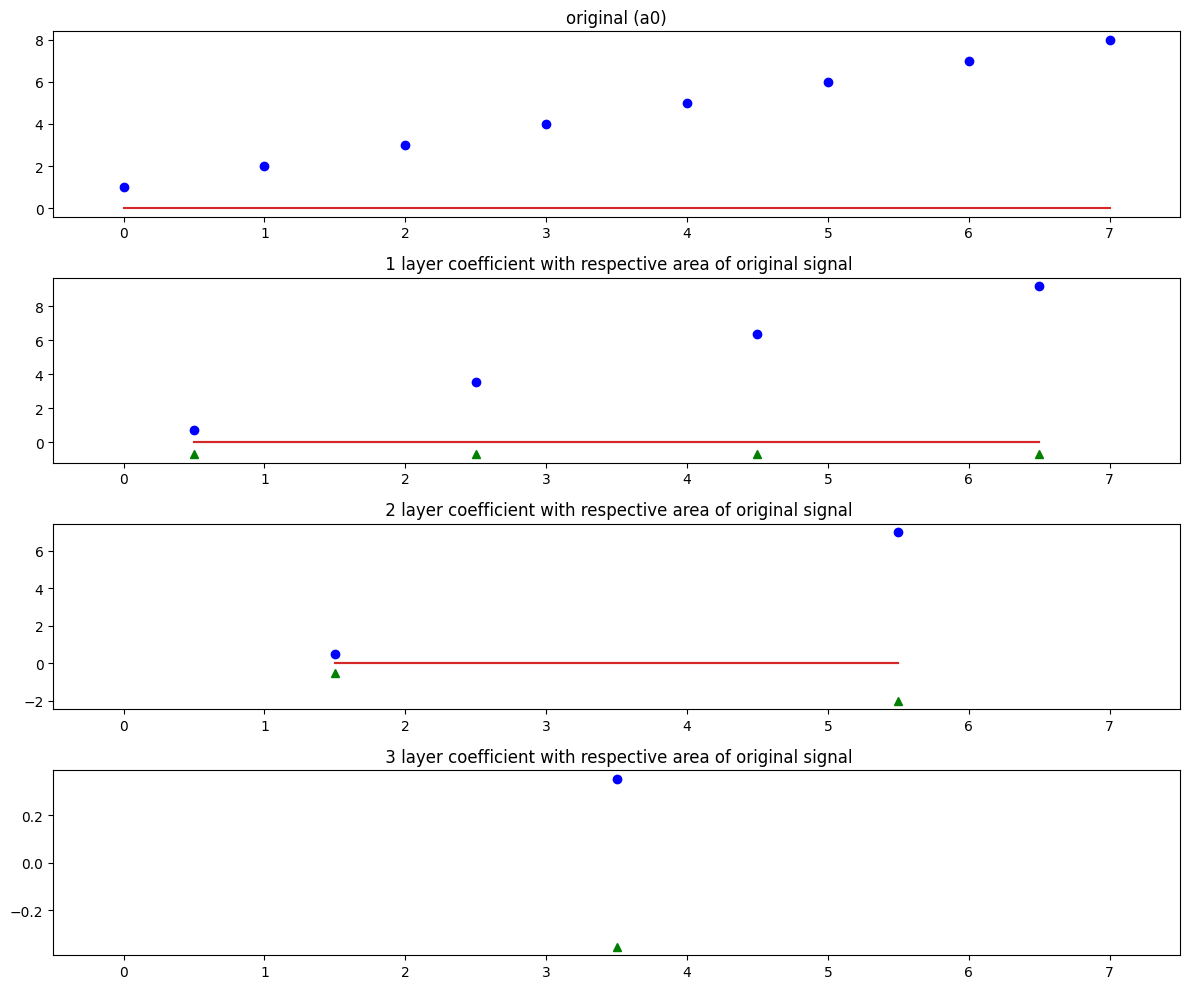

In [53]:
# 新版可视化代码（修复错误）
def plot_signal_and_coeffs():
    plt.figure(figsize=(12, 10))
    
    # 原始信号
    plt.subplot(4, 1, 1)
    markerline, stemlines, baseline = plt.stem(
        range(N), original_signal, linefmt='b-', markerfmt='bo'
    )
    plt.setp(stemlines, visible=False)  # 隐藏竖直线
    plt.title("original (a0)")
    plt.xlim(-0.5, N-0.5)

    # 各层系数
    colors = ['blue', 'green', 'red']
    for level in range(1, 4):
        plt.subplot(4, 1, level+1)
        
        # 近似系数
        a = coeffs[f'a{level}']
        a_pos = [(idx[0]+idx[1])/2 for idx in index_maps[f'a{level}']]
        markerline, stemlines, baseline = plt.stem(
            a_pos, a, linefmt='b-', markerfmt='bo'
        )
        plt.setp(stemlines, visible=False)
        
        # 细节系数
        d = coeffs[f'd{level}']
        d_pos = [(idx[0]+idx[1])/2 for idx in index_maps[f'a{level}']]
        markerline, stemlines, baseline = plt.stem(
            d_pos, d, linefmt='g--', markerfmt='g^'
        )
        plt.setp(stemlines, visible=False)
        
        plt.title(f" {level} layer coefficient with respective area of original signal")
        plt.xlim(-0.5, N-0.5)

    plt.tight_layout()
    plt.show()

plot_signal_and_coeffs()

**离散傅里叶变换（DFT）**  
全局频率分辨率：通过正交基函数（复指数）精确分析信号的整体频域特性  
计算高效  
  
无时间局部性：无法定位频域成分在时域的位置，对非平稳信号分析能力弱

**离散小波变换（DWT）**  
时频局部化：通过多尺度分析捕捉信号的瞬态特征  
稀疏性：对非平稳信号的表示更紧凑  
  
基函数依赖：小波基的选择影响分析结果  
频域分辨率不均：高频段频率分辨率较低